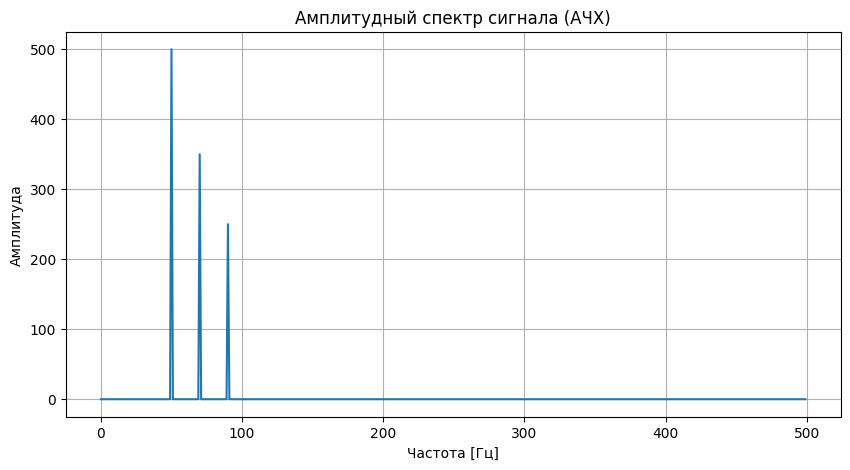

Основные гармоники сигнала (Гц): [50. 70. 90.]


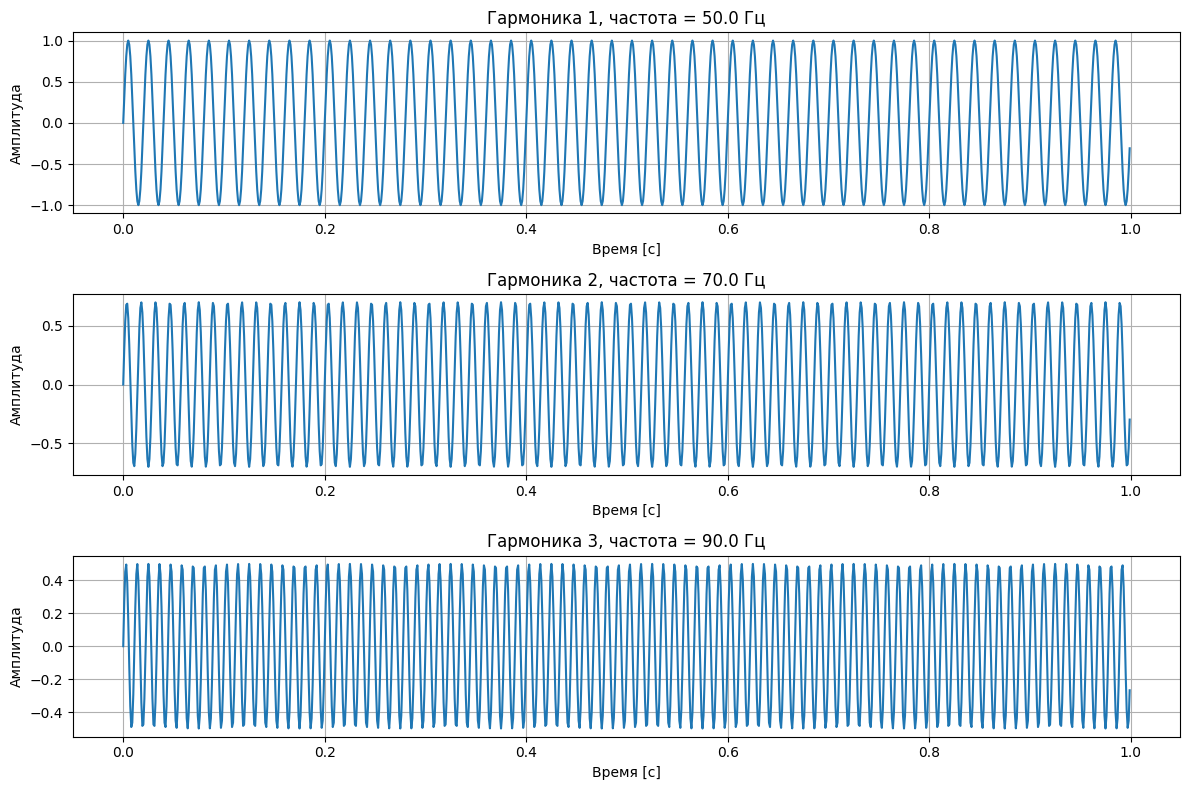

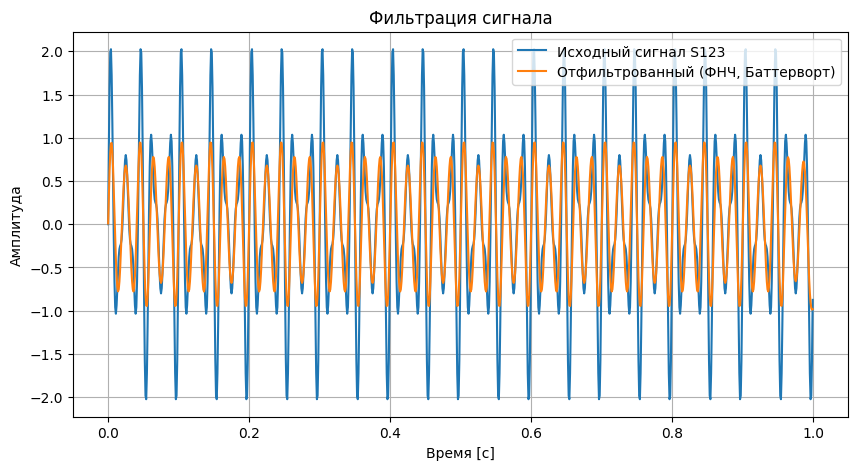

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, butter, filtfilt

fs = 1000          
T = 1              
t = np.linspace(0, T, fs*T, endpoint=False)
dt = 1/fs

S1 = np.sin(2*np.pi*50*t)
S2 = 0.7*np.sin(2*np.pi*70*t)     
S3 = 0.5*np.sin(2*np.pi*90*t)     
S123 = S1 + S2 + S3

N = len(S123)
S_fft = np.fft.fft(S123)
freqs = np.fft.fftfreq(N, d=dt)

plt.figure(figsize=(10, 5))
plt.plot(freqs[:N//2], np.abs(S_fft[:N//2]))
plt.title("Амплитудный спектр сигнала (АЧХ)")
plt.xlabel("Частота [Гц]")
plt.ylabel("Амплитуда")
plt.grid(True)
plt.show()

peaks, props = find_peaks(np.abs(S_fft[:N//2]), height=0.1*np.max(np.abs(S_fft)))
harmonics_freqs = freqs[peaks]

print("Основные гармоники сигнала (Гц):", harmonics_freqs)

plt.figure(figsize=(12, 8))

for i, k in enumerate(peaks[:3]): 
    S_fft_h = np.zeros_like(S_fft)
    S_fft_h[k] = S_fft[k]
    S_fft_h[-k] = S_fft[-k]
    
    S_harm = np.fft.ifft(S_fft_h).real
    
    plt.subplot(3,1,i+1)
    plt.plot(t, S_harm)
    plt.title(f"Гармоника {i+1}, частота = {freqs[k]:.1f} Гц")
    plt.xlabel("Время [с]")
    plt.ylabel("Амплитуда")
    plt.grid(True)

plt.tight_layout()
plt.show()

cutoff = 60
b, a = butter(4, cutoff/(fs/2), btype='low')
S123_filt = filtfilt(b, a, S123)

plt.figure(figsize=(10, 5))
plt.plot(t, S123, label="Исходный сигнал S123")
plt.plot(t, S123_filt, label="Отфильтрованный (ФНЧ, Баттерворт)")
plt.title("Фильтрация сигнала")
plt.xlabel("Время [с]")
plt.ylabel("Амплитуда")
plt.legend()
plt.grid(True)
plt.show()



# Сравнение фильтрованного и нефильтрованного сигнала

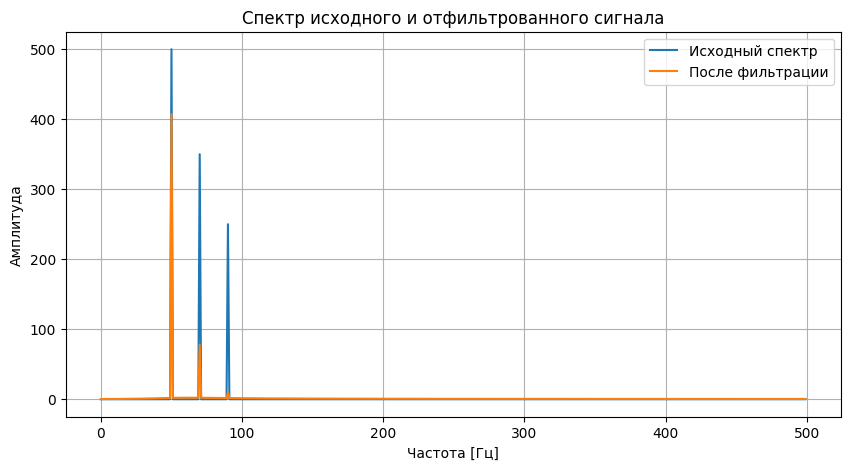

In [4]:
S_fft_filt = np.fft.fft(S123_filt)

plt.figure(figsize=(10, 5))
plt.plot(freqs[:N//2], np.abs(S_fft[:N//2]), label="Исходный спектр")
plt.plot(freqs[:N//2], np.abs(S_fft_filt[:N//2]), label="После фильтрации")
plt.title("Спектр исходного и отфильтрованного сигнала")
plt.xlabel("Частота [Гц]")
plt.ylabel("Амплитуда")
plt.legend()
plt.grid(True)
plt.show()